# Quantum Fourier Transform 

<div class="alert alert-block alert-info">
Bell state is constructed with application of $\textbf{Hadamard}$ and $\textbf{CNOT}$ gates in two qubit system.
</div>

In [92]:
%matplotlib inline
import numpy as np
import IPython
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister
from qiskit import BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import seaborn as sns
sns.set()

In [93]:
from helper import *

<div class="alert alert-block alert-info">

QFT is defined as

$ QFT:|x> = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} \omega_{x}^{k}|k>$

where $\omega_{x}^{k}$ is $N^{th}$ ($N = 2^{n}$) root of unity: $e^{\frac{2\pi i}{2^{n}}}$.

QFT: $F_{N} =  \frac{1}{\sqrt{N}} \begin{bmatrix}
    1  &         1   &        1       &     1          &   \cdots   &  1   \\
    1  &  \omega_{n} & \omega_{n}^{2} & \omega_{n}^{3} &   \cdots   & \omega_{n} ^{N-1}\\
    1  &  \omega_{n}^{2} & \omega_{n}^{4} & \omega_{n}^{6} &   \cdots   & \omega_{n} ^{2(N-1)}\\
    1  &  \omega_{n}^{3} & \omega_{n}^{6} & \omega_{n}^{9} &   \cdots   & \omega_{n} ^{3(N-1)}\\
   \vdots  & \vdots  & \vdots         & \vdots         &    \dots   & \vdots \\
   1  &  \omega_{n}^{(N-1)} & \omega_{n}^{2(N-1)} & \omega_{n}^{3(N-1)} &   \cdots   & \omega_{n} ^{(N-1((N-1)}\\
\end{bmatrix}$





### 1. QFT ( 1 qubit)

<div class="alert alert-block alert-info">

For single qubit circuit ($n = 1, N = 2^{1} = 2)$


$\omega_n = e^{\frac{2\pi i}{2^{n}}} = -1$.

QFT = $\frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}$
    
It is very simple, QFT in single qubit id just a Hadamate operation.


### 2. QFT (2 qubits)

<div class="alert alert-block alert-info">
    
For two qubit circuit, ($n =2, N = 2^{2} = 4)$


$\omega_{n} = e^{\frac{2\pi i}{2^{n}}} = i$

$QFT_2 = \frac{1}{{2}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{bmatrix}$
 
Our task is to represent this matrix in terms of fundamental gate metrix.

#### 2.2 Circuit

In [94]:
def qft2():
    qc = QuantumCircuit(2,2)
    qc.h(1)
    qc.barrier()
    qc.cu1(np.pi/2, 0, 1)
    qc.barrier()
    qc.h(0)
    qc.barrier()
    qc.swap(0,1)
    return qc

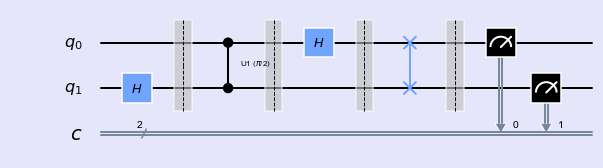

In [95]:
qc = qft2()
drawCircuit_2q(qc)

#### 2.3  State vector

Lets observe what happens to quantum state as we pass through these quantum gates one by one: 


<div class="alert alert-block alert-success">
<ul>    
<li> Initial state: |00>
<li> After Hadamard Gate on qubit 2 : $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
<li> After phase shift Gate : $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
<li> After Hadamard Gate on qubit 1 : $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> - \frac{1}{{2}}|11>$
<li> After SWAP:  $\frac{1}{{2}}|00> + \frac{1}{{2}}|10>  +  \frac{1}{{2}}|01> - \frac{1}{{2}}|11>$


In [96]:
qc = qft2()
writeState(qc)

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.5+0i)|00\\rangle + (0.5+0i)|01\\rangle + (0.5+0i)|10\…

#### 2.4  Phase

In [97]:
def getPhaseSeq():
    phaseDic = []
    qc = QuantumCircuit(2,2)
    qc0 = qc.copy()
    qc.h(1)
    qc1 = qc.copy()
    qc.cu1(np.pi/2, 0, 1)
    qc2 = qc.copy()
    qc.h(0)
    qc3 = qc.copy()
    qc.swap(0,1)
    qc4 = qc.copy()
    for iqc in [qc0,qc1,qc2,qc3,qc4]:
        phaseDic.append(getPhase(iqc))
    return phaseDic    

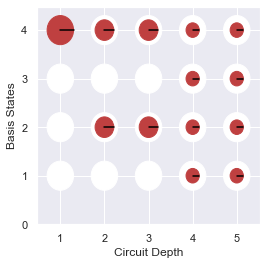

In [98]:
drawPhase(getPhaseSeq())

#### 2.5 State vector as tensor product

<div class="alert alert-block alert-info">
    
 Since this circuit consists of pure superposition brought up by hadamard gate, it is possible to obtain final state vector by taking direct product of single qubit states. Results from operation of H gate on single qubit can be multiplied with direct product operation to get final state.
    
$ \frac{1}{\sqrt{2}} (|0 \rangle + | 1\rangle) \otimes \frac{1}{\sqrt{2}}(|0 \rangle + | 1\rangle) = \frac{1}{2}(|00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle $
    

i.e., $\frac{1}{\sqrt{2}}\begin{bmatrix}
    1   \\
    1 
\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}
    1   \\
    1 
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
    1   \\
    1 \\
    1 \\
    1
\end{bmatrix}$

Where $|00 \rangle , |01 \rangle , |10 \rangle $ and $ |11 \rangle $ are basis states for two qubit system.
</div>

#### 2.6 Matrix Element

#### How to realize it the quantum circuit?

<div class="alert alert-block alert-info">
    
    
$ I = \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix};H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix}; C_{u1} = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & i
\end{pmatrix}; SWAP =\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}$


At first barrier: $ U_1 = I \otimes H $
    
At second barrier: $ U_2 =  C _{u1} \times (I \otimes H) $
    
At third barrier: $ U_3 = (H \otimes I) \times C _{u1} \times (I \otimes H) $    

At fourth barrier: $U_4 =  SWAP \times (H \otimes I) \times C _{u1} \times (I \otimes H) $     

Implementing Numpy

In [99]:
I = np.eye(2,2)
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
H_kron_I = np.kron(H,I)
CU1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0.+1.j]])
I_kron_H = np.kron(I,H)
SWAP = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])

In [100]:
U = np.dot(H_kron_I,np.dot(CU1,np.dot(I_kron_H,SWAP)))
U

array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j ,  0. +0.5j, -0.5+0.j ,  0. -0.5j],
       [ 0.5+0.j , -0.5+0.j ,  0.5+0.j , -0.5+0.j ],
       [ 0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. +0.5j]])

In [101]:
ket = np.array([1,0,0,0])
np.dot(U,ket)

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

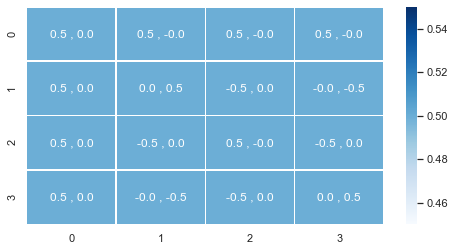

In [102]:
qc = qft2()
plotMatrix(qc)

### 3. QFT (3 qubits)

#### 3.1 Circuit Diagram

In [103]:
def qft3():
    n = 3
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q,c)
    qc.h(q[2])
    qc.barrier()
    qc.cu1(np.pi/2, q[1], q[2])
    qc.barrier()
    qc.h(q[1])
    qc.barrier()
    qc.cu1(np.pi/4, q[0], q[2])
    qc.barrier()
    qc.cu1(np.pi/2, q[0], q[1])
    qc.barrier()
    qc.h(q[0])
    qc.barrier()
    qc.swap(q[0], q[2])
    return q,c,qc

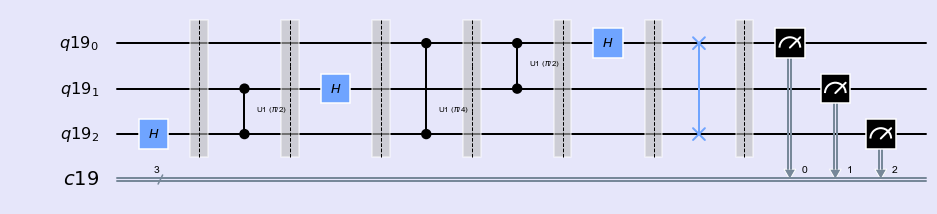

In [104]:
q,c,qc = qft3()
qc.barrier()
qc.measure(q,c)
style = {'backgroundcolor': 'lavender'}
qc.draw(output='mpl', style = style)

#### 3.2 State vector

<div class="alert alert-block alert-success">
    
<ul>        
<li> Initial state: |000>
<li> After Hadamard Gate on 3rd qubit : $\frac{1}{\sqrt{2}}(|000> + |001>) $
<li> After CU1 gate on qubit (2,3) : $\frac{1}{\sqrt{2}}(|000> + |001>) $
<li> After CU1 gate on qubit (1,3) : $\frac{1}{\sqrt{2}}(|000> + |001>) $
<li> After Hadamard Gate on qubit 2 : $\frac{1}{{2}}(|000> + |010> +  |001> -|011> )$
<li> After CU1 gate on qubit (0,1): $\frac{1}{{2}}(|000> + |010> +  |001> -|011> )$
<li> After Hadamard Gate on qubit 3 : $\frac{1}{2\sqrt{2}}(|000> + |001> +  |010> + |011> +  |000> - |001> - |010> + |011)$
    
    

In [105]:
q,c,qc = qft3()
writeState(qc)

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.354+0i)|000\\rangle + (0.354+0i)|001\\rangle + (0.354…

#### 3.3 Intermediate Ket and Phases

In [106]:
def getPhaseSeq():
    phaseDic = []
    QC = []
    n = 3
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q,c)
    qc0 = qc.copy()
    qc.h(q[2])
    qc1 = qc.copy()
    qc.cu1(np.pi/2, q[1], q[2])
    qc2 = qc.copy()
    qc.h(q[1])
    qc3 = qc.copy()
    qc.cu1(np.pi/4, q[0], q[2])
    qc4 = qc.copy()
    qc.cu1(np.pi/2, q[0], q[1])
    qc5 = qc.copy()
    qc.h(q[0])
    qc6 = qc.copy()
    qc.swap(q[0], q[2])
    qc7 = qc.copy()
    QC = [qc0,qc1,qc2,qc3,qc4,qc5,qc6,qc7]
    for iqc in QC:
        phaseDic.append(getPhase(iqc))
    return QC, phaseDic    

In [107]:
QC,phaseDic = getPhaseSeq()

In [108]:
writeState(QC[1])

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.707+0i)|000\\rangle + (0.707+0i)|100\\rangle$$')

In [109]:
writeState(QC[3])

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.5+0i)|000\\rangle + (0.5+0i)|010\\rangle + (0.5+0i)|1…

In [110]:
writeState(QC[5])

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.5+0i)|000\\rangle + (0.5+0i)|010\\rangle + (0.5+0i)|1…

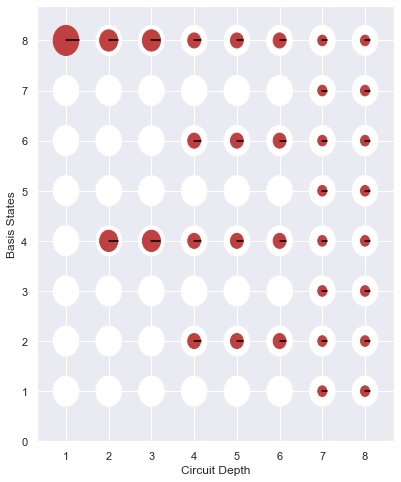

In [111]:
drawPhase(phaseDic)

#### 3.4 Matrix Element

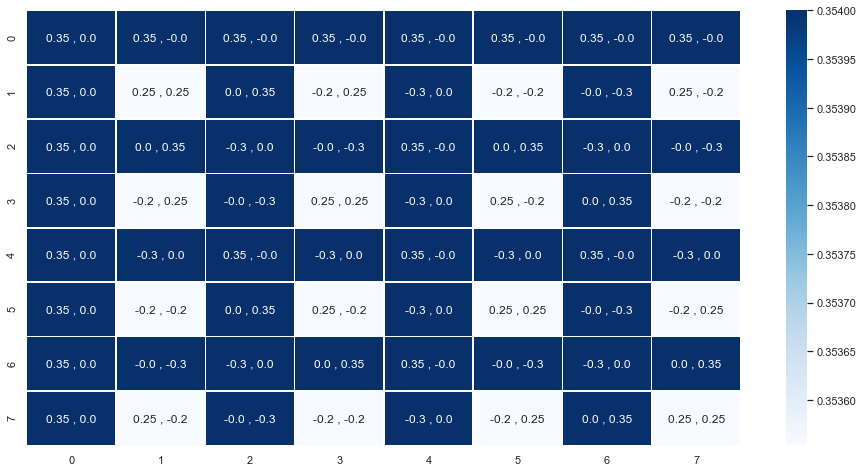

In [112]:
q,c,qc = qft3()
plotMatrix(qc)

###  4. QFT (n-qubits)

#### 4.1 What does the quantum Fourier transform look like for larger $N$?( source: qiskit textbook)

 Let's derive a transformation for $N=2^n$, $QFT_N$ acting on the state $\vert x \rangle = \vert x_1\ldots x_n \rangle$ where $x_1$ is the most significant bit. This maths is here for those that find it useful, if you struggle with it then don’t worry; as long as you understand the intuition in section 2 then you can continue straight to the next section.

<div class="alert alert-block alert-info">
$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle ~\text{since}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:\text{rewriting in fractional binary notation}\: y = y_1\ldots y_n, y/2^n = \sum_{k=1}^n y_k/2^k 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:\text{after expanding the exponential of a sum to a product of exponentials} 
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{after rearranging the sum and products, and expanding} 
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1} 
\\
& = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
\end{aligned}
$$
</div>
This is a mathematical description of the animation we saw in the intuition section:

![img](https://qiskit.org/textbook/ch-algorithms/images/fourierbasis-counting.gif)   

#### 4.2 State vector as tensor product

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Using a circut of n-qubits QFT circuit, can we express final quantum state in tensor product of single qubit states?

The circuit that implements QFT makes use of two gates. The first one is a single-qubit Hadamard gate, $H$, that you already know. From the discussion in [Example 1](#example1) above, you have already seen that the action of $H$ on the single-qubit state $\vert x_k\rangle$ is

<div class="alert alert-block alert-info">

$$H\vert x_k \rangle = \vert0\rangle + \exp\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle$$

</div>

The second is a two-qubit controlled rotation $CROT_k$ given in block-diagonal form as 


<div class="alert alert-block alert-info">
$$CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$

where 

$$UROT_k = \left[\begin{matrix}
1&0\\
0&\exp\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

</div>
 
The action of $CROT_k$ on the two-qubit state $\vert x_jx_k\rangle$ where the first qubit is the control and the second is the target is given by


<div class="alert alert-block alert-info">
    
$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$


and


$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle$$

</div>




Given these two gates, a circuit that implements [an n-qubit QFT](#qfteqn) is shown below.

![image1](https://qiskit.org/textbook/ch-algorithms/images/qft.png)

The circuit operates as follows. We start with an n-qubit input state $\vert x_1x_2\ldots x_n\rangle$.

<div class="alert alert-block alert-info">    
    
<ol>
<li> After the first Hadamard gate on qubit 1, the state is transformed from the input state to 

$$
H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the $CROT_2$ gate on qubit 1 controlled by qubit 2, the state is transformed to

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of the last $CROT_n$ gate on qubit 1 controlled by qubit $n$, the state becomes

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Noting that 

$$
x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
$$

we can write the above state as 

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of a similar sequence of gates for qubits $2\ldots n$, we find the final state to be:

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{1}}x 
\right)
\vert1\rangle\right]
$$

which is exactly the QFT of the input state as derived <a href="#qfteqn">above</a> with the caveat that the order of the qubits is reversed in the output state.
</ol>
    
</div>

### References
-----
1. https://www.youtube.com/watch?v=bntew-yoMzk 